In [ ]:
!pip install tensorflow-gpu


In [2]:
!pip install ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp36-none-any.whl size=4169 sha256=536c6aa191f2fe6ab1d735bec5663169ccf62a5c66b13a635687d0e197c68dbd
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(5,5))

# ----------------------------------------------
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#-----------------------------------------------
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

<Figure size 360x360 with 0 Axes>

In [4]:
df=pd.read_csv("/content/drive/My Drive/CANCER/data.csv")

In [5]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


PREPROCESSING

In [6]:
df.drop(['id'], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Encoding


In [7]:
encode = LabelEncoder()
df['diagnosis'] = encode.fit_transform(df['diagnosis'])

In [8]:
features = list(df.columns[1:31])
len(features)

30

In [9]:
scaler = StandardScaler()

### Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['diagnosis'].values, test_size=0.15, random_state=0)

In [57]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the third hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.2))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_31 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_32 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 7)                 112       
_________________________________________________________________
dropout_33 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)               

In [58]:
history=classifier.fit(scaler.fit_transform(X_train.values), np.array(y_train),batch_size = 4,epochs=50,validation_split=0.20)

Epoch 1/50
97/97 [==============================] - 1s 3ms/step - loss: 0.6815 - accuracy: 0.6653 - val_loss: 0.4319 - val_accuracy: 0.9691
Epoch 2/50
97/97 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.9514 - val_loss: 0.0989 - val_accuracy: 0.9897
Epoch 3/50
97/97 [==============================] - 0s 1ms/step - loss: 0.1210 - accuracy: 0.9766 - val_loss: 0.0623 - val_accuracy: 0.9794
Epoch 4/50
97/97 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.9554 - val_loss: 0.0460 - val_accuracy: 0.9794
Epoch 5/50
97/97 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9855 - val_loss: 0.0464 - val_accuracy: 0.9794
Epoch 6/50
97/97 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9789 - val_loss: 0.0409 - val_accuracy: 0.9794
Epoch 7/50
97/97 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 0.9747 - val_loss: 0.0367 - val_accuracy: 0.9794
Epoch 8/50
97/97 [==

In [60]:
y_prediction = classifier.predict_classes(scaler.transform(X_test.values))


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


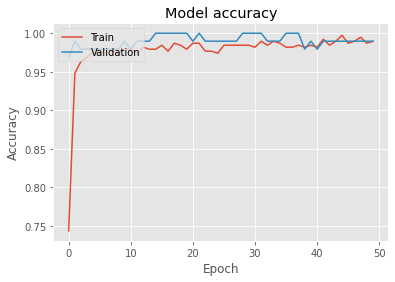

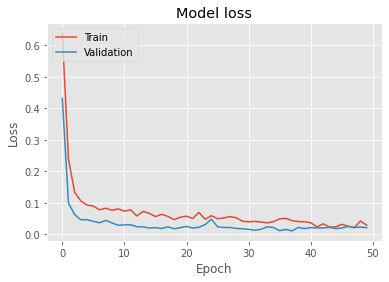

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Accuracy: 97.67441860465115%


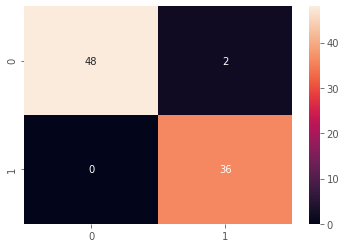

In [63]:
#print(len(y_test),len(y_prediction))
cm = confusion_matrix(y_test, y_prediction)
tn, fn, fp, tp=confusion_matrix(y_prediction,y_test).ravel()


accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")
sns.heatmap(cm, annot=True)
plt.savefig('h.png')
plt.show()

In [64]:
precision, recall,fscore, support =  precision_recall_fscore_support(y_test, y_prediction, average=None)

print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)
print('True Positive', tp)

total = tn + tp + fn + fp

print('Test Accuracy : ', (tn + tp)/total)
print('Misclassification Rate : ', (fn + fp)/total)
print('precision : ', precision)
print('recall : ', recall)
print('FScore : ', fscore)
print('Support : ', support)
print('Sensitivity or TPR : ', (tp/ (tp + fn)) )
print('Specificity or TNR : ', (tn/(tn+fp)))
print('False Positive Rate or Fallout : ', (fp/(fp+tn)))
print('False Negative Rate : ', (fn/(fn+tp)))

print('False Discovery Rate : ', (fp/(tp+fp)))

True Negative 48
False Positive 2
False Negative 0
True Positive 36
Test Accuracy :  0.9767441860465116
Misclassification Rate :  0.023255813953488372
precision :  [1.         0.94736842]
recall :  [0.96 1.  ]
FScore :  [0.97959184 0.97297297]
Support :  [50 36]
Sensitivity or TPR :  1.0
Specificity or TNR :  0.96
False Positive Rate or Fallout :  0.04
False Negative Rate :  0.0
False Discovery Rate :  0.05263157894736842


In [48]:
from ann_visualizer.visualize import ann_viz;



In [65]:
ann_viz(classifier, title="Neural Network")